# This Notebook is for EDA and Clean-up of the provided data set for the Machine Learning course

## Set Up

In [817]:
# Standard Libraries
import pandas as pd
import numpy as np
import os
import warnings

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# SkLearn Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


# set Theme
plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')

In [818]:
# Get Main Data
path = os.getcwd()
path = path +'\\medical_data\\'
file = 'data.csv'

mainData = pd.read_csv(path+file)
mainData.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,24437208,135,Caucasian,Female,[50-60),NaN,2,1,1,8,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
1,29758806,378,Caucasian,Female,[50-60),NaN,3,1,1,2,...,No,No,No,No,No,No,No,No,No,NO
2,189899286,729,Caucasian,Female,[80-90),NaN,1,3,7,4,...,No,No,No,No,No,No,No,No,Yes,NO
3,64331490,774,Caucasian,Female,[80-90),NaN,1,1,7,3,...,No,No,No,No,No,No,No,Ch,Yes,NO
4,14824206,927,AfricanAmerican,Female,[30-40),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,NO


In [819]:
# Get Admission Type Look-Up
file = 'id_lookup.csv'
admissionTypeLookUp = pd.read_csv(path+file)
admissionTypeLookUp = admissionTypeLookUp.iloc[:8]
admissionTypeLookUp['admission_type_id'] = admissionTypeLookUp['admission_type_id'].astype(int)
admissionTypeLookUp

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [820]:
# Set Aside Copy of DF for Experiments
expData = mainData

## Re-Usable Functions

In [821]:
def OrdinalEncoderFunc (df,listOfVars,order):
    df=df
    order=order
    enc = OrdinalEncoder(categories=[order])
    for col in listOfVars:
        col=col
        df[col] = enc.fit_transform(df[[col]])
    return df

In [822]:
def nullAnalysis2(df):
    row = []
    null_summaryDF = pd.DataFrame(columns = ["Variable","Observations","Nulls","Null_Per","Num_Unique","Type"])
    for column in df:
        var = column
        countOfObs = len(df[var])
        countOfNull = df[var].isnull().sum()
        perOfNull = round((100 * countOfNull) / countOfObs,3)
        numUnique = df[var].nunique()
        type  = df[var].dtypes
        # Append to Summary DF
        row = [var, countOfObs,countOfNull,perOfNull,numUnique,type]
        df_length = len(null_summaryDF)
        null_summaryDF.loc[df_length] = row
    # Get Summary Stats
    countofVars = len(null_summaryDF)
    countofNotNull = (null_summaryDF['Nulls'] == 0).sum()
    countofNull = (null_summaryDF['Nulls'] != 0).sum()
    print(f"Count of Variables:",countofVars)
    print(f"Count of Variables without nulls:",countofNotNull)
    print(f"Count of Variables with null :",countofNull)
    # Format Summary
    summaryDF = null_summaryDF[null_summaryDF['Nulls'] != 0].sort_values(by=['Nulls'],ascending=False)
    return summaryDF

In [823]:
#  Split function
## Note: set test size to 20%

def testTrainSplit (df, PredictorVar,ResponseVar):
    df=df
    # Split into training/test
    x = df[PredictorVar]
    y = df[ResponseVar]
    # Split Data Set Seed NP Random
    np.random.seed(1) # seed np random
    ## split data - use "random_state = any number (42) if you want reproducable splits.
    ### Remove random-state if you want random
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size = 0.2)
    return x_train, x_test, y_train, y_test

In [824]:
def createConfMatrix (regObj, y_test, y_pred, x_test):
    # Logistic Regression -- Step 5 -- Create Confusion Matrix
    cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
    cm.columns.name = 'Predicted'
    cm.index.name = 'True'
    # Logistic Regression -- Step 6 -- Calc Accuracy From Test Set
    score = regObj.score(x_test, y_test)
    score = round(score,4)
    return cm, score

## General EDA

In [825]:
# Data Shape
mainData.shape

(71518, 50)

In [826]:
# Check Nulls
print("Count Of Nulls:")
mainData.isna().sum()

Count Of Nulls:


encounter_id                    0
patient_nbr                     0
race                         1948
gender                          0
age                             0
weight                      68665
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  31043
medical_specialty           34477
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         11
diag_2                        294
diag_3                       1225
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [827]:
# Check data types
mainData.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [828]:
mainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71518 entries, 0 to 71517
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      69570 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   weight                    2853 non-null   object
 6   admission_type_id         71518 non-null  int64 
 7   discharge_disposition_id  71518 non-null  int64 
 8   admission_source_id       71518 non-null  int64 
 9   time_in_hospital          71518 non-null  int64 
 10  payer_code                40475 non-null  object
 11  medical_specialty         37041 non-null  object
 12  num_lab_procedures        71518 non-null  int64 
 13  num_procedures            71518 non-null  int64 
 14  num_medications       

In [829]:
# Describe
mainData.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
count,7.151800e+04,7.151800e+04,69570,71518,71518,2853,71518.000000,71518.000000,71518.000000,71518.00000,...,71518,71518,71518,71518,71518,71518,71518,71518,71518,71518
unique,NaN,NaN,5,3,10,9,NaN,NaN,NaN,NaN,...,1,4,4,2,1,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),[75-100),NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,53491,38025,18210,1195,NaN,NaN,NaN,NaN,...,71518,34921,71016,71511,71518,71516,71517,39494,54319,42985
mean,1.568156e+08,5.505160e+07,NaN,NaN,NaN,NaN,2.100254,3.593235,5.657457,4.28913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.003769e+08,3.947573e+07,NaN,NaN,NaN,NaN,1.508301,5.269771,4.162580,2.94921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.145807e+07,2.337577e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.440574e+08,4.816680e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,3.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.155513e+08,8.752222e+07,NaN,NaN,NaN,NaN,3.000000,3.000000,7.000000,6.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [830]:
numericFeatures = mainData.select_dtypes(include= np.number)
numericFeatures =  numericFeatures.drop(columns=['encounter_id','patient_nbr'])

In [831]:
numericFeatures.nunique()

admission_type_id             8
discharge_disposition_id     26
admission_source_id          17
time_in_hospital             14
num_lab_procedures          116
num_procedures                7
num_medications              75
number_outpatient            33
number_emergency             18
number_inpatient             13
number_diagnoses             16
dtype: int64

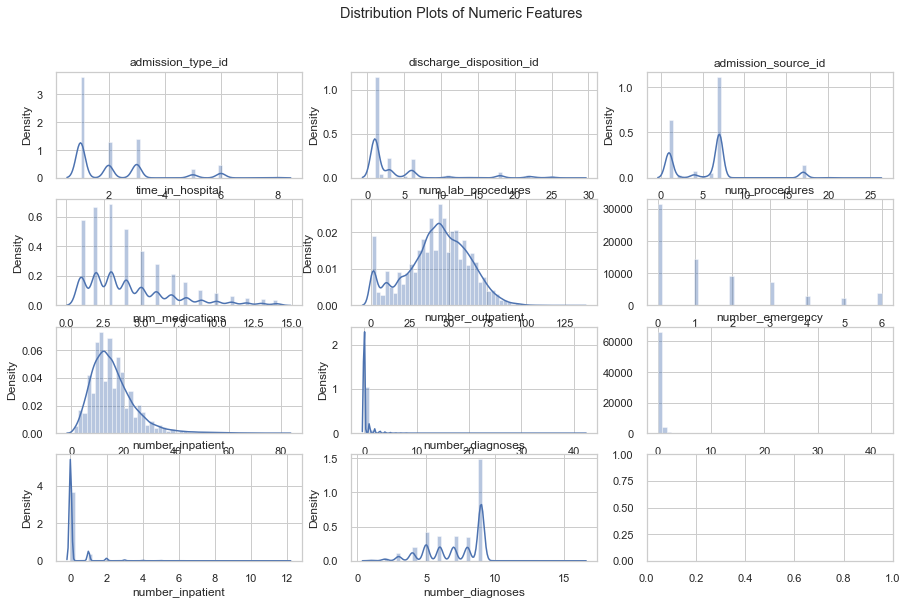

In [832]:
# Distribution Plots

fig, axes = plt.subplots(4,3, sharex=False, sharey=False, figsize=(15,9))
fig.suptitle('Distribution Plots of Numeric Features')

sns.distplot(numericFeatures['admission_type_id'], ax=axes[0,0], kde=True).set(title='admission_type_id')
sns.distplot(numericFeatures['discharge_disposition_id'], ax=axes[0,1], kde=True).set(title='discharge_disposition_id')
sns.distplot(numericFeatures['admission_source_id'], ax=axes[0,2], kde=True).set(title='admission_source_id')
sns.distplot(numericFeatures['time_in_hospital'], ax=axes[1,0], kde=True).set(title='time_in_hospital')
sns.distplot(numericFeatures['num_lab_procedures'], ax=axes[1,1], kde=True).set(title='num_lab_procedures')
sns.distplot(numericFeatures['num_procedures'], ax=axes[1,2], kde=False).set(title='num_procedures')
sns.distplot(numericFeatures['num_medications'], ax=axes[2,0], kde=True).set(title='num_medications')
sns.distplot(numericFeatures['number_outpatient'], ax=axes[2,1], kde=True).set(title='number_outpatient')
sns.distplot(numericFeatures['number_emergency'], ax=axes[2,2], kde=False).set(title='number_emergency')
sns.distplot(numericFeatures['number_inpatient'], ax=axes[3,0], kde=True).set(title='number_inpatient')
sns.distplot(numericFeatures['number_diagnoses'], ax=axes[3,1], kde=True).set(title='number_diagnoses')

plt.show()

In [833]:
# sns.pairplot(numericFeatures)

## General Data Clean-Up (Before Test/Train Split)


In [834]:
# Print Null Summary
nullSummary = nullAnalysis2(mainData)
nullSummary

Count of Variables: 50
Count of Variables without nulls: 43
Count of Variables with null : 7


,Variable,Observations,Nulls,Null_Per,Num_Unique,Type
5,weight,71518,68665,96.011,9,object
11,medical_specialty,71518,34477,48.207,70,object
10,payer_code,71518,31043,43.406,17,object
2,race,71518,1948,2.724,5,object
20,diag_3,71518,1225,1.713,758,object
19,diag_2,71518,294,0.411,725,object
18,diag_1,71518,11,0.015,696,object


In [835]:
# Null Clean-Up1 -- Drop Columns with high % of nulls, that aren't worth filling
mainData = mainData.drop(columns=['weight','medical_specialty','payer_code'])

In [836]:
# Diag Clean-Up
## If diag_2 is null, then use diag_3.  If diag_1 is null, then use diag_2
## Solves all but 1 null Diag1, which is dropped
## TODO: Determine how to drop value from column that I pull from.
mainData['diag_2'] = mainData['diag_2'].fillna(mainData['diag_3'])
mainData['diag_1'] = mainData['diag_1'].fillna(mainData['diag_2'])
mainData = mainData.dropna(subset=['diag_1'])

In [837]:
# Remove Deceased Patients
## Note: The research question is about predicting what patients will be re-admitted.
## In order to not skew the resutls, patients who died while admitted should be removed from the prediction

# Create List of Deceased
## Note: I only removed cases that explicity said the patient expired.
## I did not remove patients who were transfered to hospice (13,14)

expCodes = ['11','19','20','21']
mainData = mainData[~mainData['discharge_disposition_id'].isin(expCodes)]

In [838]:
# Re-Run Null Summary
nullSummary = nullAnalysis2(mainData)
nullSummary

Count of Variables: 47
Count of Variables without nulls: 44
Count of Variables with null : 3


,Variable,Observations,Nulls,Null_Per,Num_Unique,Type
2,race,70433,1921,2.727,5,object
17,diag_3,70433,1224,1.738,757,object
16,diag_2,70433,243,0.345,724,object


In [839]:
# Ordinal Encode Medication Variables

## Set List of Variabales
medCols = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
            'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
            'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide',
            'citoglipton','insulin','glyburide.metformin','glipizide.metformin','glimepiride.pioglitazone',
            'metformin.rosiglitazone','metformin.pioglitazone'] #Note: 'README' states 'sitagliptin' but not in data

## Define Func Params
df=mainData
listOfVars = medCols
order = ['No','Down','Steady','Up']

## Execute
mainData  = OrdinalEncoderFunc(df,listOfVars,order)

In [840]:
# Add Variable For Number of Medications

mainData.insert(47,"num_of_meds", 0)
mainData['num_of_meds'] = mainData[medCols].ne(0).sum(axis=1)

In [841]:
# Add Variable for Medication Level Up Or Down

## In the Medication columns 1 signifies that dosage decreased, 3 signifies that dosage increased
## This counts the number of 1 and coverts to a negative, then the adds the number of 3
## Result indicates the net level of medication change

mainData.insert(48,"med_level_direction", 0)
mainData['med_level_direction'] = ((mainData[medCols] == 1).sum(axis=1)*-1) + \
                                  (mainData[medCols] == 3).sum(axis=1)

### Replace Look-Up Values With Literal Values


In [842]:
# Add Admission Type Values (Note: Did not drop ID)

# Add Column
mainData.insert(7,"admission_type_value", 0)

# Left Join
mainData = pd.merge(mainData,admissionTypeLookUp,on='admission_type_id')

# Replace Values
mainData['admission_type_value'] = mainData['description']
mainData = mainData.drop(columns=['description'])
mainData.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_type_value,admission_source_id,time_in_hospital,...,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,num_of_meds,med_level_direction
0,24437208,135,Caucasian,Female,[50-60),2,1,Urgent,1,8,...,0.0,0.0,0.0,0.0,0.0,Ch,Yes,<30,3,-1
1,60254142,1314,Caucasian,Female,[40-50),2,1,Urgent,1,2,...,0.0,0.0,0.0,0.0,0.0,No,Yes,>30,1,0
2,14897280,2025,Caucasian,Female,[70-80),2,3,Urgent,1,12,...,0.0,0.0,0.0,0.0,0.0,Ch,Yes,NO,2,-1
3,36469686,3069,Caucasian,Male,[60-70),2,1,Urgent,1,8,...,0.0,0.0,0.0,0.0,0.0,No,Yes,NO,1,0
4,20602470,8460,Caucasian,Male,[80-90),2,1,Urgent,1,2,...,0.0,0.0,0.0,0.0,0.0,No,Yes,NO,1,0


## Additional Data Clean-Up (After Test/Train Split)

In [843]:
def EncodeResponse (df):
    df=df
    # Execute Encoding
    dummyTemp = pd.get_dummies(df['readmitted'],prefix='readmitted_')
    df = df.join(dummyTemp)
    # Customize/ Clean-Up
    ## Make 'readmitted' more logical so it is 0 when no and 1 when yes
    df = df.drop(columns=['readmitted']) # Drop Old Readmitted Column
    df = df.rename(columns={'readmitted__NO': 'readmitted'}) # Rename encoded column
    df = df.dropna(subset=['readmitted']) # drop puzzling 1 nan value
    df['readmitted'] = df['readmitted'].map({0:1, 1:0}) # reverse encoding to make logical
    return df

In [844]:
def AdditionalClean (df):
    df=df
    #1 - Null Clean-Up2 -- Fillna's for variables with nulls that have value to keep
    df['race'] = df['race'].fillna('Unknown')
    #2 - EncodeResponse
    df = EncodeResponse(df)
    return df

In [845]:
mainData = AdditionalClean(mainData)
mainData['race'].value_counts(dropna=False)

Caucasian          52663
AfricanAmerican    12692
Unknown             1921
Hispanic            1506
Other               1161
Asian                490
Name: race, dtype: int64

# Run Models

## Prep -- Split Data
TODO: This is the wrong place - should be earlier in the code - adding here for now to just get the models working
and because I was confused by where to split based on needing to clean the response variable (ie should I split twice)

TODO: Don't yet know how to deal with multiple response variables.  First pass will keep it simple and only predict
if readmitted is yes/no.  Will need to add timeline response variables later

In [846]:
# TEMP: Create copy of mainData

tempModelingDF = mainData

In [847]:
tempModelingDF

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_type_value,admission_source_id,time_in_hospital,...,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,num_of_meds,med_level_direction,readmitted__<30,readmitted__>30,readmitted
0,24437208,135,Caucasian,Female,[50-60),2,1,Urgent,1,8,...,0.0,0.0,0.0,Ch,Yes,3,-1,1,0,1
1,60254142,1314,Caucasian,Female,[40-50),2,1,Urgent,1,2,...,0.0,0.0,0.0,No,Yes,1,0,0,1,1
2,14897280,2025,Caucasian,Female,[70-80),2,3,Urgent,1,12,...,0.0,0.0,0.0,Ch,Yes,2,-1,0,0,0
3,36469686,3069,Caucasian,Male,[60-70),2,1,Urgent,1,8,...,0.0,0.0,0.0,No,Yes,1,0,0,0,0
4,20602470,8460,Caucasian,Male,[80-90),2,1,Urgent,1,2,...,0.0,0.0,0.0,No,Yes,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70428,402583472,141357506,AfricanAmerican,Male,[50-60),7,3,Trauma Center,7,6,...,0.0,0.0,0.0,No,Yes,1,0,0,0,0
70429,389059568,141433160,Caucasian,Female,[80-90),7,3,Trauma Center,7,4,...,0.0,0.0,0.0,No,No,0,0,0,0,0
70430,311376116,141459548,Caucasian,Female,[80-90),7,1,Trauma Center,7,2,...,0.0,0.0,0.0,Ch,Yes,2,0,0,0,0
70431,403231316,141466478,Caucasian,Male,[10-20),7,6,Trauma Center,7,9,...,0.0,0.0,0.0,No,No,0,0,0,0,0


In [848]:
# Drop columns that are not needed
# TODO: Needs to move up
varsToDrop = ['admission_type_id','admission_source_id','admission_type_value','discharge_disposition_id',
              'time_in_hospital','num_lab_procedures','num_procedures','num_medications',
              'number_outpatient','number_emergency','number_inpatient',
              'diag_1','diag_2', 'diag_3','number_diagnoses', 'max_glu_serum','A1Cresult',
              'change','diabetesMed']

tempModelingDF = tempModelingDF.drop(columns=varsToDrop)
tempModelingDF


,encounter_id,patient_nbr,race,gender,age,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,...,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,num_of_meds,med_level_direction,readmitted__<30,readmitted__>30,readmitted
0,24437208,135,Caucasian,Female,[50-60),2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,-1,1,0,1
1,60254142,1314,Caucasian,Female,[40-50),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,1
2,14897280,2025,Caucasian,Female,[70-80),0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2,-1,0,0,0
3,36469686,3069,Caucasian,Male,[60-70),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
4,20602470,8460,Caucasian,Male,[80-90),0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70428,402583472,141357506,AfricanAmerican,Male,[50-60),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
70429,389059568,141433160,Caucasian,Female,[80-90),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
70430,311376116,141459548,Caucasian,Female,[80-90),2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0,0,0,0
70431,403231316,141466478,Caucasian,Male,[10-20),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [849]:
# TEMP
## Demographic Vars + Identifiers to Drop
tempModelingDF = tempModelingDF.drop(columns=['encounter_id','patient_nbr','race','gender','age'])

## Additional Response Vars to Drop
tempModelingDF = tempModelingDF.drop(columns=['readmitted__<30','readmitted__>30'])
tempModelingDF

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,num_of_meds,med_level_direction,readmitted
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3,-1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,0,1
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2,-1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,0,0
70429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
70430,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2,0,0
70431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [850]:
# Multiple Regression -- Set or Reset Test/Train Split
# Params
df=tempModelingDF
ResponseVar = 'readmitted'
PredictorVar = df.columns.values.tolist()
PredictorVar.remove(ResponseVar)

# Function Call To prep train/test
x_train, x_test, y_train, y_test  = testTrainSplit(df, PredictorVar, ResponseVar)
x_train


,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,num_of_meds,med_level_direction
8357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2,0
64934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,0
54458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,-1
29981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
56042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
6265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
54886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,0


## Random Forest

# Experimentation/ Scratchpad


In [851]:
expData.sample(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
67474,125860038,112183470,Caucasian,Male,[40-50),NaN,3,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
1070,75305544,414639,Caucasian,Male,[60-70),NaN,2,8,1,6,...,No,No,No,No,No,No,No,Ch,Yes,NO
24824,171280554,29825208,AfricanAmerican,Male,[80-90),NaN,3,1,1,1,...,No,No,No,No,No,No,No,No,Yes,>30
55019,221470950,89490195,Caucasian,Female,[60-70),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,No,>30
48710,280849116,79581222,Caucasian,Male,[60-70),NaN,1,1,7,4,...,No,Down,No,No,No,No,No,Ch,Yes,>30
12198,40199220,13917636,Caucasian,Female,[80-90),NaN,1,3,7,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
29301,216025812,39932325,Caucasian,Female,[70-80),NaN,3,1,1,1,...,No,No,No,No,No,No,No,No,Yes,NO
18023,77167542,23403168,Caucasian,Male,[70-80),NaN,6,25,17,1,...,No,Steady,No,No,No,No,No,No,Yes,NO
44754,286221510,67970871,Caucasian,Female,[90-100),NaN,1,3,7,4,...,No,Steady,No,No,No,No,No,No,Yes,<30
69702,371912234,138705692,Caucasian,Male,[70-80),NaN,1,6,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [852]:
corr_matrix = mainData.corr()
corr_matrix['time_in_hospital'].sort_values(ascending=False)

time_in_hospital            1.000000
num_medications             0.467912
num_lab_procedures          0.332195
number_diagnoses            0.234510
num_procedures              0.187976
discharge_disposition_id    0.165686
insulin                     0.108649
num_of_meds                 0.085683
number_inpatient            0.063636
readmitted                  0.061567
readmitted__<30             0.054745
med_level_direction         0.040097
repaglinide                 0.032336
glyburide                   0.031669
readmitted__>30             0.031428
glipizide                   0.025355
glimepiride                 0.018539
acetohexamide               0.012454
pioglitazone                0.008604
admission_source_id         0.007714
rosiglitazone               0.007411
nateglinide                 0.007086
acarbose                    0.006771
troglitazone                0.004551
tolbutamide                 0.002854
chlorpropamide              0.002430
metformin.pioglitazone      0.002200
g

In [853]:
mainData['gender'].value_counts(dropna=False)

Female             37468
Male               32962
Unknown/Invalid        3
Name: gender, dtype: int64

In [854]:
expVars = ['num_of_meds','med_level_direction','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
            'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
            'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide',
            'citoglipton','insulin','glyburide.metformin','glipizide.metformin','glimepiride.pioglitazone',
            'metformin.rosiglitazone','metformin.pioglitazone','readmitted']

expSummaryVars = ['num_of_meds','med_level_direction','readmitted']

tempCor = mainData[expSummaryVars]
tempCor.sample(5)

,num_of_meds,med_level_direction,readmitted
28714,1,0,0
8050,0,0,1
26635,1,1,0
56160,0,0,1
25433,1,0,1


<AxesSubplot:>

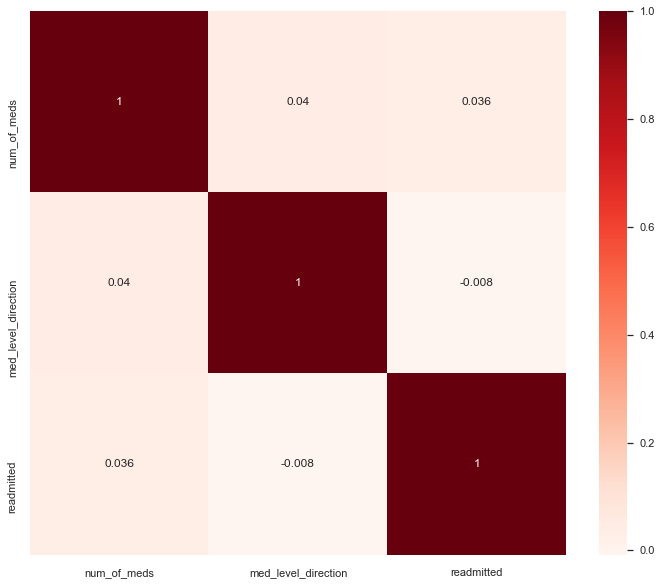

In [855]:
#Multiple Regression -- Check Correlations in HeatMap
plt.figure(figsize=(12,10))
cor = round(tempCor.corr(),3)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [856]:
#Multiple Regressions -- Correlation with output variable
responseVar = 'readmitted'
cor_target = abs(cor[responseVar])
#Selecting highly correlated features
#relevant_features = cor_target[cor_target>=0.01] # Look for Features w/ greater 0.05 cor
#relevant_features
cor_target

num_of_meds            0.036
med_level_direction    0.008
readmitted             1.000
Name: readmitted, dtype: float64

In [857]:
mainData.shape

(70433, 52)

In [858]:
mainData['patient_nbr'].nunique()

70433